# Course Information
DDS8555 - Predictive Analysis<br>
Assignment 6<br>
Unsupervised Learning - PCA and K-Means and Hierarchical Clustering.

By - Samuel Mbah Nde
Due Date and Time: Sunday March 9th 2025 at 11:59PM PST.

# Conceptual Questions

This file contains solutions to the conceptual questions from ISLP python that are part of this week's assignments. There are 2 questions, Conceptual question 1 and question 7 from chapter 12.

## Import the packages needed analyze data.
I will load all the packages needed in one place to keep my code organized.

In [43]:
import math
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches
import seaborn as sns
from scipy import stats
from scipy.stats import probplot
from scipy.cluster.hierarchy import linkage, cophenet
from scipy.spatial.distance import pdist
import statsmodels.api as sm
import re, os, json, requests, random
from datetime import datetime, timedelta, timezone
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import  LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso
from sklearn.model_selection import cross_val_score, KFold, train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import (mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score,
                            accuracy_score, f1_score, precision_score, recall_score, pairwise_distances, silhouette_score)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report 
from sklearn import datasets
from ISLP import load_data, confusion_table
from ISLP.models import (summarize,
                         poly,
                         ModelSpec)
from functools import partial
from statsmodels.gam.api import BSplines
from statsmodels.stats.anova import anova_lm

# Conceptual Question 1
This is question 1 from page 252 of ISLP.
The solution to this question is in the attached Microsoft word document that is submitted as part of this assignement.

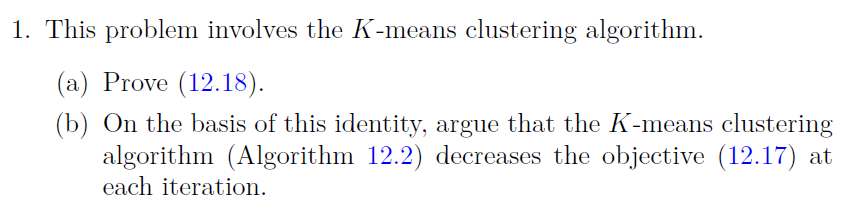

## Conceptual Question 2:
This is question 7 from page 254 of ISLP.
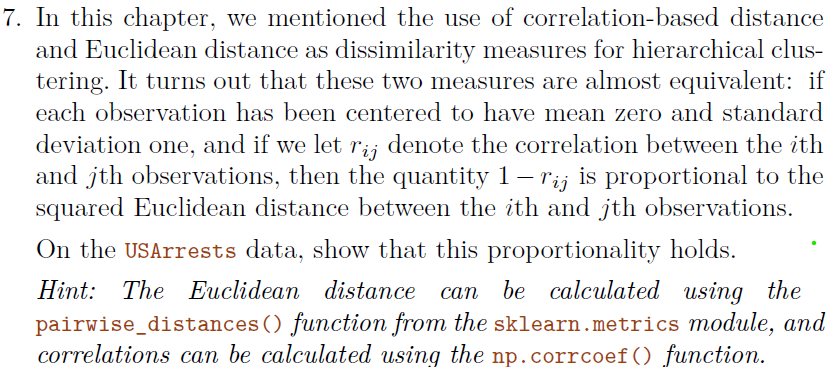

In [7]:
# Load the USArrests dataset from seaborn
df = pd.read_csv('Data/USArrests/USArrests.csv')
df.shape


(50, 5)

In [8]:
df.describe(include = 'all')

,States,Murder,Assault,UrbanPop,Rape
count,50,50.00000,50.000000,50.000000,50.000000
unique,50,NaN,NaN,NaN,NaN
top,Alabama,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,7.78800,170.760000,65.540000,21.232000
std,NaN,4.35551,83.337661,14.474763,9.366385
min,NaN,0.80000,45.000000,32.000000,7.300000
25%,NaN,4.07500,109.000000,54.500000,15.075000
50%,NaN,7.25000,159.000000,66.000000,20.100000
75%,NaN,11.25000,249.000000,77.750000,26.175000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [10]:
df.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [11]:
df_numeric = df[['Murder', 'Assault', 'UrbanPop', 'Rape']]

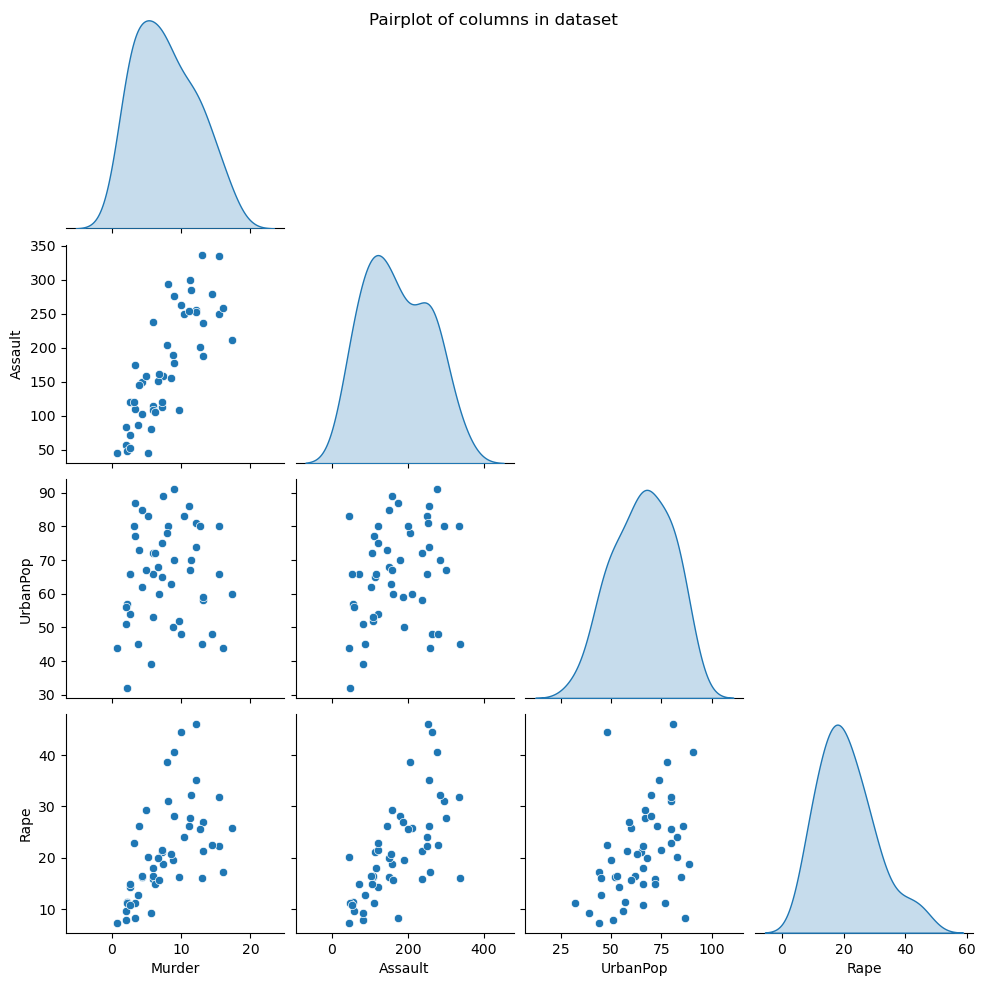

In [12]:
g = sns.pairplot(df_numeric, corner=True, diag_kind='kde')
# Set the title of the plot
g.fig.suptitle(f"Pairplot of columns in dataset")
plt.show()

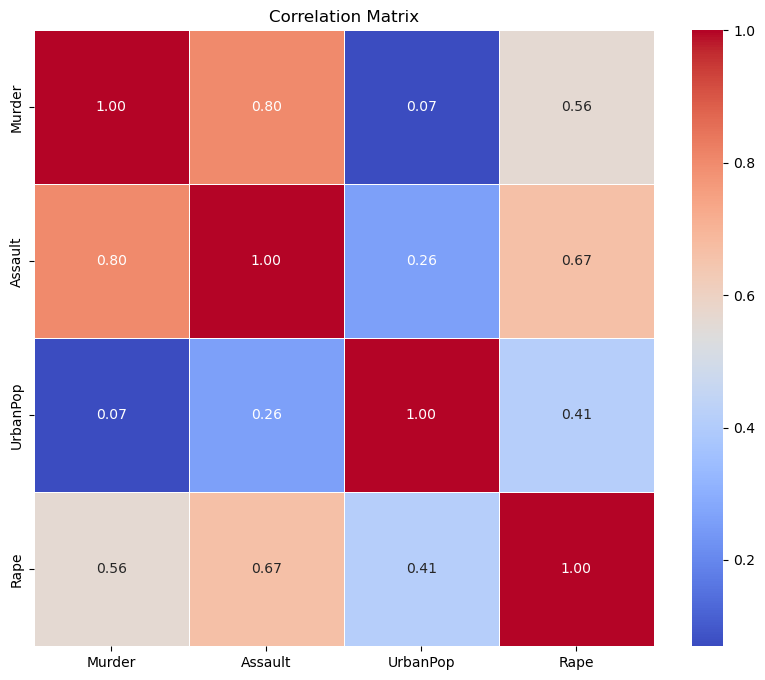

In [13]:
correlation_matrix = df_numeric.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

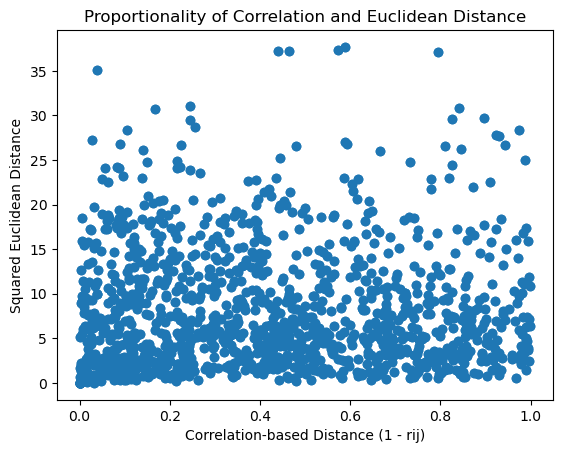

Proportionality constant (slope): 1.1341708448292085


In [14]:
# 1. Scale the dataset
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_numeric)

# 2. Calculate correlation matrix and correlation-based distance
correlation_matrix = np.corrcoef(scaled_df)
correlation_distance = 1 - np.abs(correlation_matrix)

# 3. Calculate squared Euclidean distance
euclidean_distance = pairwise_distances(scaled_df, metric='euclidean')
squared_euclidean_distance = euclidean_distance ** 2

# 4. Show proportionality
# Flatten the matrices to compare corresponding elements
corr_dist_flat = correlation_distance.flatten()
sq_euc_dist_flat = squared_euclidean_distance.flatten()

# 5. Plot the flattened values
plt.scatter(corr_dist_flat, sq_euc_dist_flat)
plt.xlabel('Correlation-based Distance (1 - rij)')
plt.ylabel('Squared Euclidean Distance')
plt.title('Proportionality of Correlation and Euclidean Distance')
plt.show()

# 6. Calculate the proportionality constant (slope of the line)
slope = np.polyfit(corr_dist_flat, sq_euc_dist_flat, 1)[0]
print(f"Proportionality constant (slope): {slope}")

In [15]:
random.seed(6222)

## Question 3 - Clustering with wines dataset from kaggle

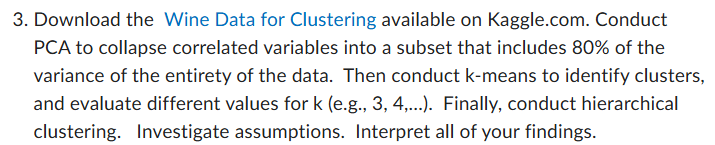

## Load the data and perform some EDA.


In [19]:
wines = pd.read_csv('Data/Wines/wine-clustering.csv')
wines.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [20]:
wines.describe(include = 'all')

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [21]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


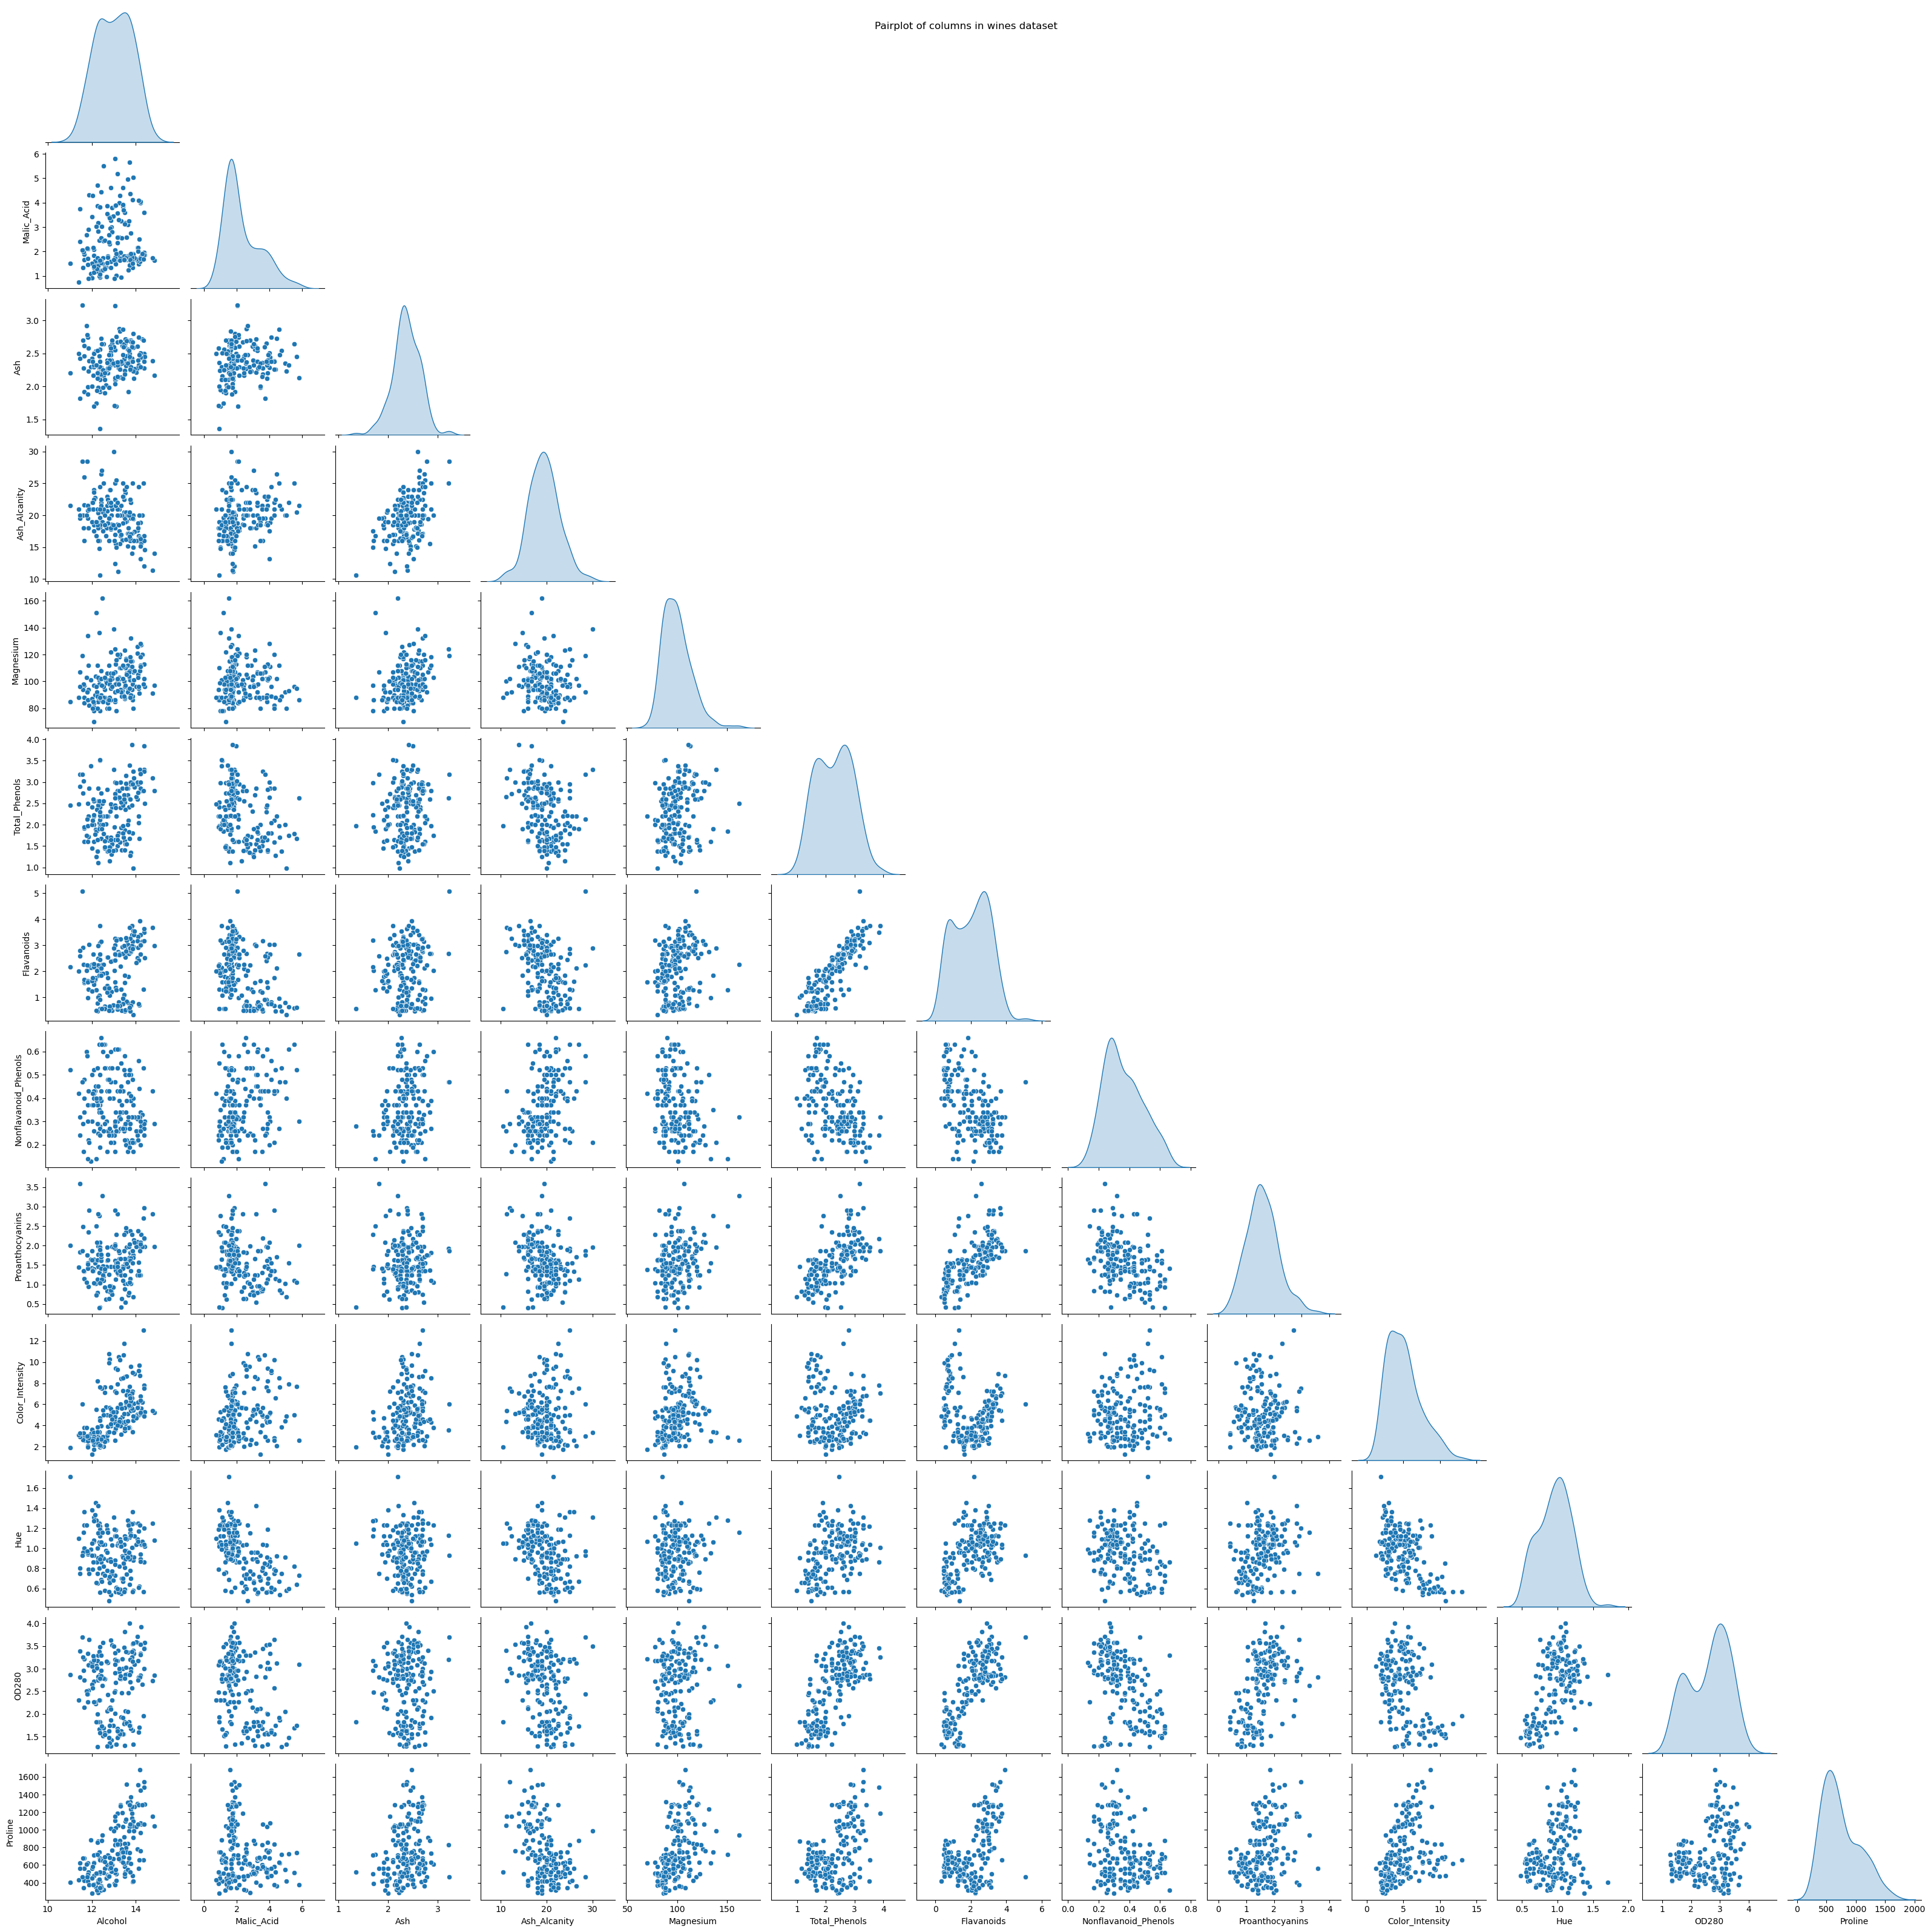

In [22]:
g = sns.pairplot(wines, corner=True, diag_kind='kde')
# Set the title of the plot
g.fig.suptitle(f"Pairplot of columns in wines dataset")
plt.show()

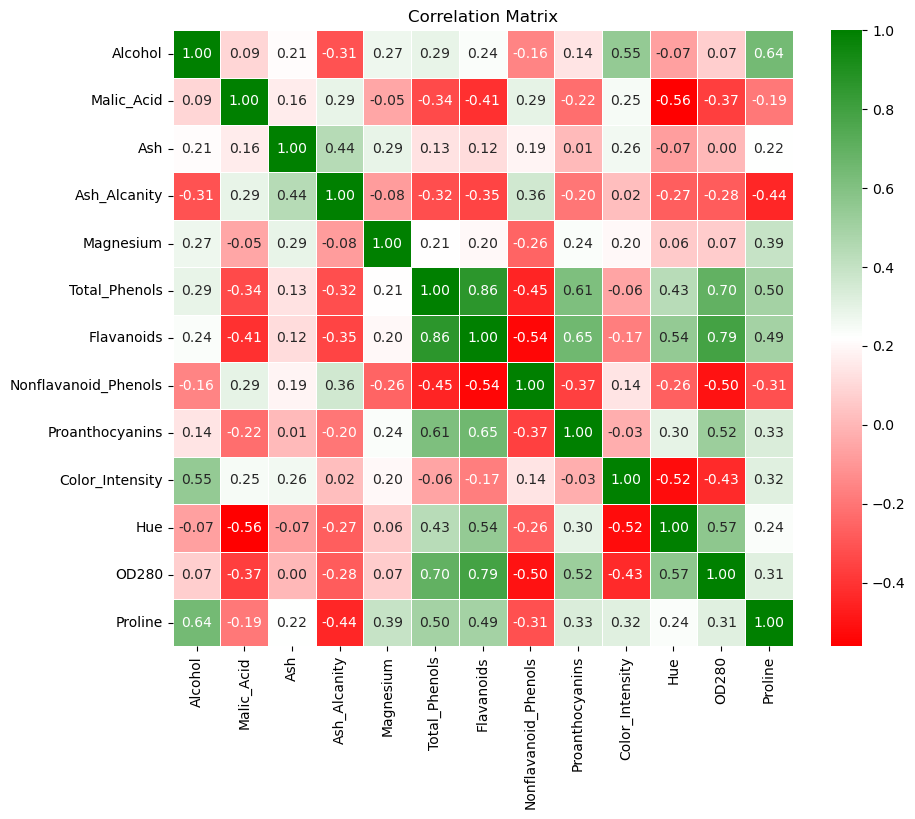

In [23]:
correlation_matrix = wines.corr(method='pearson')
plt.figure(figsize=(10, 8))
cmap=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256) 
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [24]:
np.min(correlation_matrix), sorted(set(np.ravel(correlation_matrix)))[-2]

(-0.5612956886649447, 0.8645635000951147)

## Performing PCA with with as much components as needed to get 80% variation in the dataset.
Below, I first scale the dataset and then I apply PCA. In order to make clearly visible where the explained variation reaches 80%, I set the number of components to 83%.

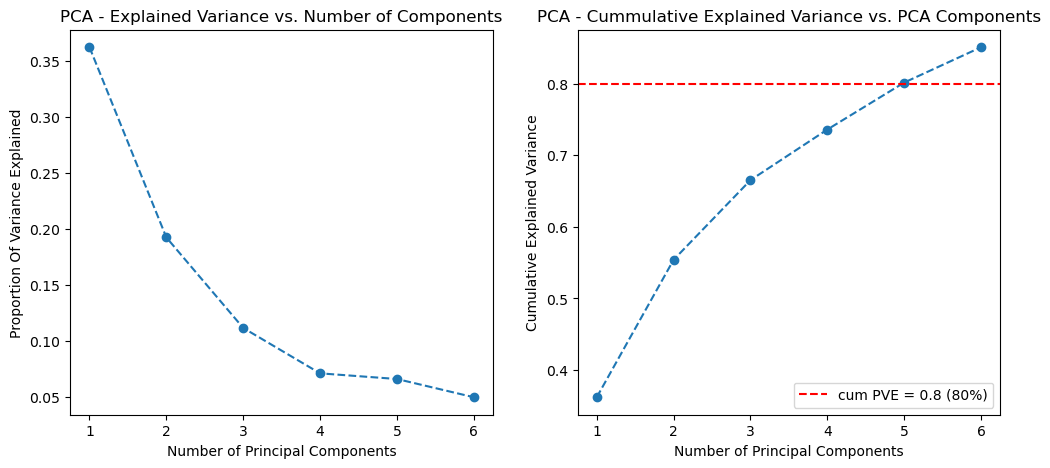

In [26]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(wines)

# Step 2: PCA to retain 83% variance
pca = PCA(n_components=0.83)  # Retains 83% of variance, ensures we can clearly capture when we reach 80%
pca_data = pca.fit_transform(df_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance.cumsum()

# Create the plot
ig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
axes[0].set_xlabel("Number of Principal Components")
axes[0].set_ylabel("Proportion Of Variance Explained")
axes[0].set_title("PCA - Explained Variance vs. Number of Components")


axes[1].plot(range(1, len(explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
axes[1].axhline(y=0.80, color='r', linestyle='--', label='cum PVE = 0.8 (80%)')
axes[1].set_xlabel("Number of Principal Components")
axes[1].set_ylabel("Cumulative Explained Variance")
axes[1].set_title("PCA - Cummulative Explained Variance vs. PCA Components")
axes[1].legend(loc='lower right')



## Step 2: K-Means Clustering - Choosing Optimal K

I choose the optimal value of k by looping through various values of k from 1 through 11 and then plot an elbow plot to visually inspect and choose the location of the elbow.

In [28]:
wcss = []  # Within-cluster sum of squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)

C:\Users\snde\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\snde\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\snde\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\snde\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarn

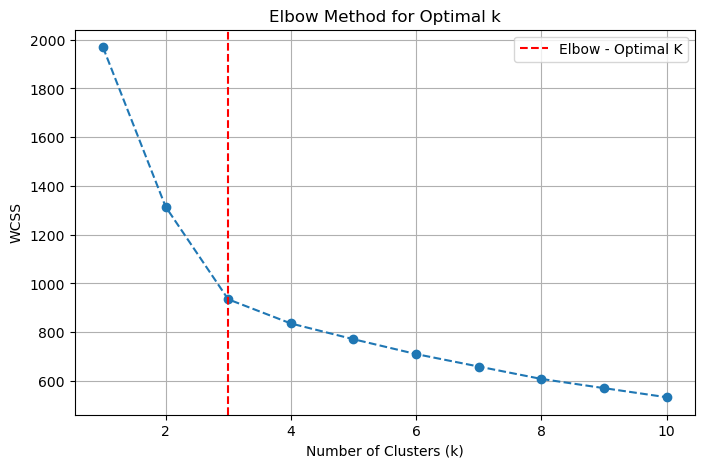

In [29]:
# Plot the Elbow Method
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.axvline(x=3, color='r', linestyle='--', label='Elbow - Optimal K')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.grid()
plt.legend()
plt.show()


## Step 4: Apply K-Means with the optimal k which as shown in plot above, it is 3.

In [31]:
optimal_k = 3  # Based on elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=20)
wines["KMeans_Cluster"] = kmeans.fit_predict(pca_data)

C:\Users\snde\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [32]:
pca_data[0]

array([ 3.31675081, -1.44346263, -0.16573904, -0.21563119,  0.69304284,
       -0.22388013])

## Visuallize the 3 clusters predicted along with the first 2 principal components.

In [34]:
df_pca = pd.DataFrame(pca_data, columns = [f'PCA_{ind}' for ind in range(1, len(pca_data[0]) + 1)])
df_pca["KMeans_Cluster"] = kmeans.fit_predict(pca_data)
df_pca.head()

C:\Users\snde\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,KMeans_Cluster
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,2
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,2
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,2
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,2
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,2


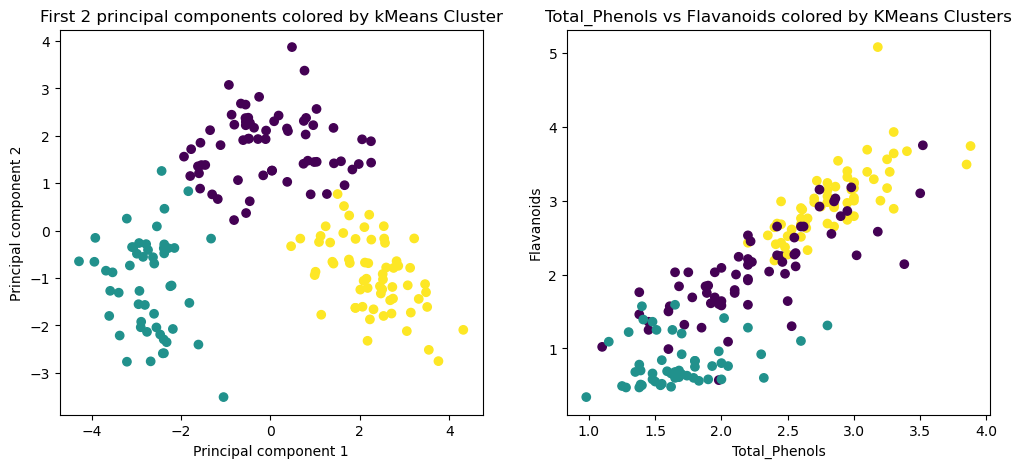

In [35]:
ig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(x='PCA_1', y='PCA_2', data = df_pca, c='KMeans_Cluster')
axes[0].set_xlabel("Principal component 1")
axes[0].set_ylabel("Principal component 2")
axes[0].set_title("First 2 principal components colored by kMeans Cluster")

axes[1].scatter(x='Total_Phenols', y='Flavanoids', data = wines, c='KMeans_Cluster')
axes[1].set_xlabel("Total_Phenols")
axes[1].set_ylabel("Flavanoids")
axes[1].set_title("Total_Phenols vs Flavanoids colored by KMeans Clusters")
plt.show()

## Step 5: Hierarchical clustering.

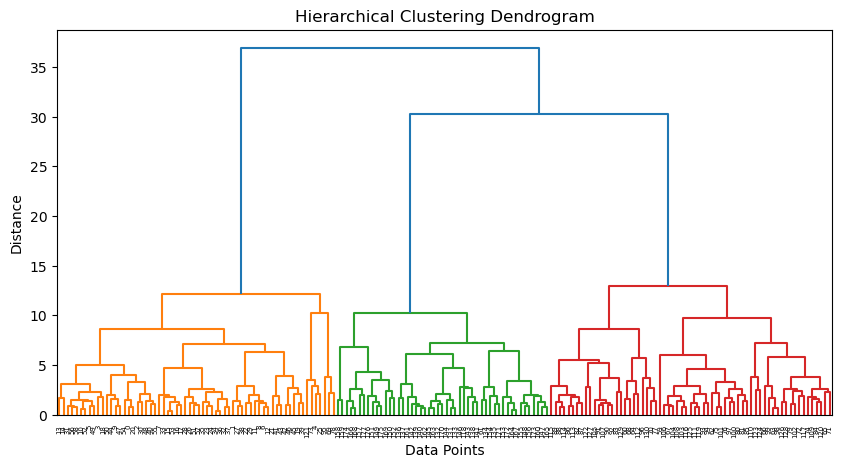

In [37]:
linked = linkage(df_pca, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# Step 6: Apply Agglomerative Clustering with chosen k
hierarchical = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
hierarchical_preds = hierarchical.fit_predict(pca_data)
wines["Hierarchical_Cluster"] = hierarchical_preds
df_pca["Hierarchical_Cluster"] = hierarchical_preds

In [38]:
## Comparison plot of predictions from Hierarchical clustering vs 

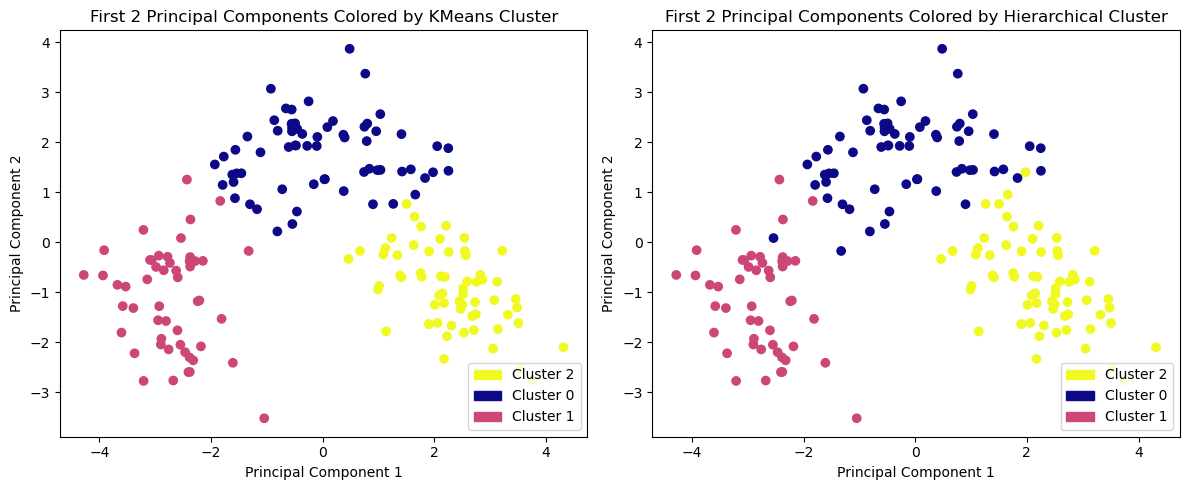

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# KMeans Clustering Scatter Plot (PCA)
scatter_kmeans_pca = axes[0].scatter(df_pca['PCA_1'], df_pca['PCA_2'], c=df_pca['KMeans_Cluster'], cmap='plasma')
axes[0].set_xlabel("Principal Component 1")
axes[0].set_ylabel("Principal Component 2")
axes[0].set_title("First 2 Principal Components Colored by KMeans Cluster")

# Create legend for KMeans
unique_kmeans_clusters = df_pca['KMeans_Cluster'].unique()
legend_kmeans = [mpatches.Patch(color=scatter_kmeans_pca.cmap(scatter_kmeans_pca.norm(label)), label=f'Cluster {label}') for label in unique_kmeans_clusters]
axes[0].legend(handles=legend_kmeans, loc='lower right')

# Hierarchical Clustering Scatter Plot (PCA)
scatter_hier_pca = axes[1].scatter(df_pca['PCA_1'], df_pca['PCA_2'], c=df_pca['Hierarchical_Cluster'], cmap='plasma')
axes[1].set_xlabel("Principal Component 1")
axes[1].set_ylabel("Principal Component 2")
axes[1].set_title("First 2 Principal Components Colored by Hierarchical Cluster")

# Create legend for Hierarchical Clustering
unique_hier_clusters = df_pca['Hierarchical_Cluster'].unique()
legend_hier = [mpatches.Patch(color=scatter_hier_pca.cmap(scatter_hier_pca.norm(label)), label=f'Cluster {label}') for label in unique_hier_clusters]
axes[1].legend(handles=legend_hier, loc='lower right')


plt.tight_layout()
plt.show()


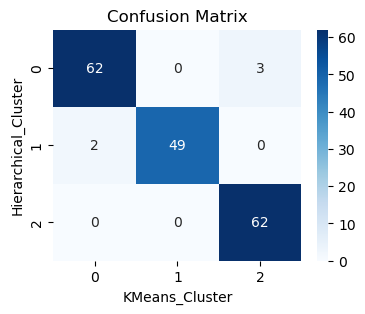

In [40]:
# Display the confusion matrix using seaborn heatmap
plt.subplots(1, 1, figsize=(4, 3))
cm = confusion_matrix(y_true = wines.KMeans_Cluster, y_pred=wines.Hierarchical_Cluster)
labels=['KMeans_Cluster', 'Hierarchical_Clusters']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('KMeans_Cluster')
plt.ylabel('Hierarchical_Cluster')
plt.title('Confusion Matrix')
plt.show()

In [41]:
print(classification_report(y_true = wines.KMeans_Cluster, y_pred=wines.Hierarchical_Cluster))
print('\n \t\tClassification Report')

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        65
           1       1.00      0.96      0.98        51
           2       0.95      1.00      0.98        62

    accuracy                           0.97       178
   macro avg       0.97      0.97      0.97       178
weighted avg       0.97      0.97      0.97       178


 		Classification Report


In [49]:
# Calculate Silhouette score and the cophenetic correlation coefficient
silhouette_avg = silhouette_score(pca_data, wines['KMeans_Cluster'])

c, _ = cophenet(linked, pdist(pca_data))

print(f"Cophenetic Correlation Coefficient Hierarchical_Clustering: {c}")
print(f"Silhouette Score for KMeans_Cluster: {silhouette_avg}")

Cophenetic Correlation Coefficient Hierarchical_Clustering: 0.6682624303805287
Silhouette Score for KMeans_Cluster: 0.3462566199998672


## Cluster Quality
The silhouette scores are both positive indicating that the clusters are a good fit. 
**Note:** A Silhouette score ranges from -1 to 1 with 1 indicating a perfect fit and 0 representing the worst fit in the cluster. O indicates not a good fit.

The **Cophenetic Correlation Coefficient of 0.668** indicates that the hierarchical clusters are a good fit for the data.

# Key Observations

## Dimensionality Reduction
- PCA reduced the dataset while retaining at least **80% variance**.
- The **elbow plot** helped visualize the variance retained.

## K-Means Clustering
- The **elbow method** suggested an optimal *3*.
- The scatter plot of **PCA-transformed data** showed 3 distinct groups but there is some degree of overlap.

## Hierarchical Clustering
- The **dendrogram** helped determine a reasonable cut for cluster assignment.
- **Agglomerative clustering** results were compared with K-Means results in a confusion matrix.

## Cluster Interpretations
- **Similarity** of results between **K-Means** and **hierarchical clustering** validates cluster structure.
- **PCA components** provided meaningful cluster separations.

# Final Thoughts

## Assumptions Investigated
- **PCA** assumes **linear relationships** and **standardization** which were both done on the dataset.
- **K-Means** assumes **spherical clusters** (sensitive to initial centroid selection). The clusters plotted in 2-D looked spherical.
- **Hierarchical clustering** assumes a **nested structure** of relationships which is displayed in the tree.

### How to Test These Assumptions
1. **PCA Assumption (Linear Relationships & Standardization)**
   - **Check correlations** between features to confirm linear relationships - I showed that the data does contain some degree of correlation from the correlation map plotted above..
   - **Use a scree plot** to ensure enough variance is retained.

2. **K-Means Assumption (Spherical Clusters & Centroid Sensitivity)**
   - **Visualize clusters** in 2D using PCA.
   - **Use silhouette scores** to evaluate clustering quality.
   - **Run K-Means multiple times** with different centroid initializations (was done with `init` set to 20 to ensure that the algorithm runs multiple times and returns the best results.

3. **Hierarchical Clustering Assumption (Nested Structure)**
   - **Compare dendrogram cuts** with domain knowledge.
   - **Use cophenetic correlation coefficient** to measure how well the clustering preserves pairwise distances.
   - **Try different linkage methods** (e.g., single, complete, average).

